# How many women survived on the _Titanic_?

***

In [34]:
import csv
import pandas as pd
import seaborn as sb
PATH = "./Datasets/titanic.csv"

## Custom Python

In [35]:
databank = list()
with open(PATH, "r") as fr:
    reader = csv.reader(fr, delimiter=",")
    for line in reader:
        databank.append(line)

In [36]:
len(databank)  # 892 --> Databank is refreshed. 

892

## Quick Solution

In [37]:
# FIRST STEP: Get a new object holding women data from original databank
data_female = []
for i in range(1, len(databank)):
    if databank[i][4] == "female":
        data_female.append(databank[i])
# SECOND STEP: Get another new object holding survivors from women databank
data_female_survived = []
for i in range(len(data_female)):
    if data_female[i][1] == '1':
        data_female_survived.append(data_female[i])
# THIRD STEP: Get length of remaining data
len(data_female_survived)

233

## Enhanced Solution

In [38]:
# ALTERNATE: Remove men data from original object
# RETURN: Object (list of lists) containing only women on Titanic
# ALTERNATE: Remove dead data from original subject
# RETURN: Object (list of lists) containing women on Titanic who lived
# THIRD STEP: Get length of remaining data

## Pandas

In [39]:
df = pd.read_csv(PATH)
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
ARG_WOMEN = (df["Sex"] == "female")
ARG_LIVED = (df["Survived"] == 1)

len(df[ARG_WOMEN & ARG_LIVED])

233

In [41]:
len(df[df["Sex"] != "female"])

577

In [42]:
import pandas as pd

df = pd.DataFrame(data= {'name':['john', 'mary', 'peter','jeff','bill', 'lisa'], 'age':[23, 78, 22, 19, 45, 33], 
                         'state': ['iowa', 'dc', 'california', 'texas', 'washington', 'dc'], 'num_children': [2, 2, 0, 1, 2, 1],
                        'num_pets' : [0, 4, 0, 5, 0, 0]})
    

In [43]:
df

,name,age,state,num_children,num_pets
0,john,23,iowa,2,0
1,mary,78,dc,2,4
2,peter,22,california,0,0
3,jeff,19,texas,1,5
4,bill,45,washington,2,0
5,lisa,33,dc,1,0


In [44]:
df.columns

Index(['name', 'age', 'state', 'num_children', 'num_pets'], dtype='object')

In [45]:
df.iloc[1]

name            mary
age               78
state             dc
num_children       2
num_pets           4
Name: 1, dtype: object

In [46]:
df[df['age'] > 30]

,name,age,state,num_children,num_pets
1,mary,78,dc,2,4
4,bill,45,washington,2,0
5,lisa,33,dc,1,0


In [47]:
df.age

0    23
1    78
2    22
3    19
4    45
5    33
Name: age, dtype: int64

In [48]:
df[df.age > 30]

,name,age,state,num_children,num_pets
1,mary,78,dc,2,4
4,bill,45,washington,2,0
5,lisa,33,dc,1,0


## Select dataframe such that the return dataframe has more pets than children

In [49]:
df[df.num_pets > df.num_children]

,name,age,state,num_children,num_pets
1,mary,78,dc,2,4
3,jeff,19,texas,1,5


In [50]:
df[(df.age > 40) & (df.num_pets > 0)]

,name,age,state,num_children,num_pets
1,mary,78,dc,2,4


### More Pandas

In [51]:
df.drop(['age', 'num_children'], axis=1)

,name,state,num_pets
0,john,iowa,0
1,mary,dc,4
2,peter,california,0
3,jeff,texas,5
4,bill,washington,0
5,lisa,dc,0


In [52]:
df.describe()

,age,num_children,num_pets
count,6.000000,6.000000,6.000000
mean,36.666667,1.333333,1.500000
std,22.384518,0.816497,2.345208
min,19.000000,0.000000,0.000000
25%,22.250000,1.000000,0.000000
50%,28.000000,1.500000,0.000000
75%,42.000000,2.000000,3.000000
max,78.000000,2.000000,5.000000


In [53]:

sum(df.age) / len(df.age)

36.666666666666664

In [54]:
import numpy as np

df[['age', 'num_pets', 'num_children']].apply(lambda col: np.mean(col, axis=0))

age             36.666667
num_pets         1.500000
num_children     1.333333
dtype: float64

In [55]:
import matplotlib.pyplot as plt

## Plot how many of the passengers were children, youth, middle age or old?

In [56]:
df.shape

(6, 5)

In [57]:
df['Age'].hist(bins=16)
plt.show()

KeyError: 'Age'

In [58]:
import csv
import pandas as pd

PATH = "./Datasets/titanic.csv"

df = pd.read_csv(PATH)


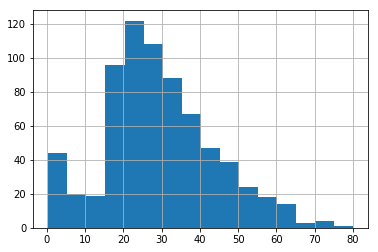

In [59]:
df['Age'].hist(bins=16)
plt.show()

### How many of Age values are empty (or null)?

In [60]:
df['Age'].isna().sum()

177

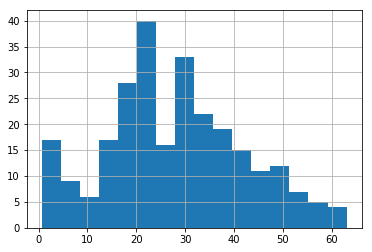

In [61]:
df[(df['Sex'] == "female")].Age.hist(bins=16)
plt.show()

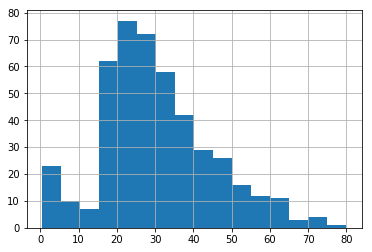

In [62]:
df[(df['Sex'] == "male")].Age.hist(bins=16)
plt.show()

In [63]:
# Parch = number of parent or children on board
# SibSp = number of siblings or spouses

## Create a new column as gender, when Sex is female it is zero when sex is male it is one

In [64]:
df['Gender'] = df['Sex'].apply(lambda sex: "1" if sex == "male" else "0") # Credit with google and Wu including my own brain! 
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0


In [65]:
df.shape

(891, 13)

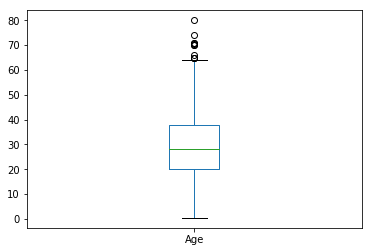

In [66]:
df['Age'].plot.box()

In [67]:
len(df['Age'].dropna().values)

714

In [68]:
df[df['Embarked'] == "C"].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,0
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,1
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,1


## Plot the Age range for those whose Embarked were 'C'

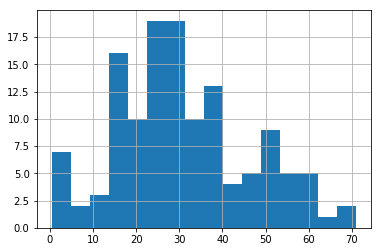

In [69]:
df[df['Embarked'] == "C"]['Age'].hist(bins = 16)

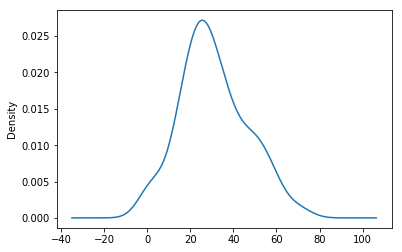

In [70]:
df[df['Embarked'] == "C"]['Age'].plot(kind = "kde")

In [71]:
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [72]:
df.Embarked.nunique()

3

## Count the different 'Embarked' values the dataframe has

In [73]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

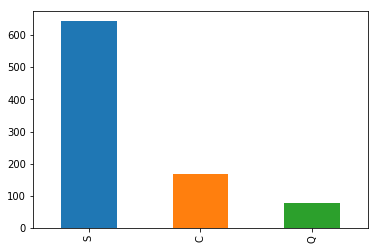

In [74]:
df.Embarked.value_counts().plot(kind = 'bar')

In [75]:
import seaborn as sns

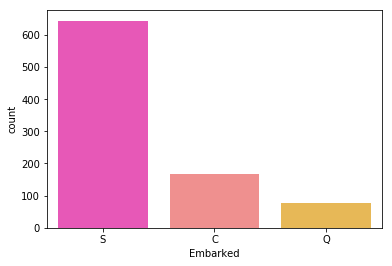

In [76]:
sns.countplot(x="Embarked", palette="spring", data=df)

In [77]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Sex
female    AxesSubplot(0.125,0.125;0.775x0.755)
male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

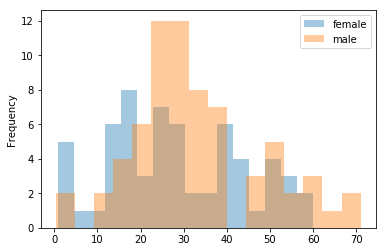

In [78]:
df[df['Embarked'] == "C"].groupby('Sex')['Age'].plot(kind= "hist", bins = 16, alpha = .4, legend = True)


In [79]:
df[df['Embarked'] == 'C'].groupby('Sex')['Age'].value_counts()

Sex     Age  
female  24.00    5
        17.00    3
        18.00    3
        30.00    3
        0.75     2
        14.00    2
        15.00    2
        22.00    2
        23.00    2
        38.00    2
        39.00    2
        44.00    2
        50.00    2
        54.00    2
        1.00     1
        3.00     1
        4.00     1
        5.00     1
        9.00     1
        13.00    1
        14.50    1
        16.00    1
        19.00    1
        21.00    1
        27.00    1
        28.00    1
        29.00    1
        31.00    1
        32.00    1
        35.00    1
                ..
male    49.00    3
        17.00    2
        23.00    2
        24.00    2
        29.00    2
        33.00    2
        56.00    2
        58.00    2
        71.00    2
        0.42     1
        1.00     1
        11.00    1
        12.00    1
        15.00    1
        18.00    1
        23.50    1
        28.00    1
        28.50    1
        31.00    1
        32.00    1
        32.50    

In [80]:
# df[df['Embarked'] == "C"].groupby('Sex')['Age'].plot(kind= "hist", bins = 16, alpha = .4, legend = True)
df[df['Embarked'] == 'C'].groupby('Sex')['Age'].agg(np.mean)

Sex
female    28.344262
male      32.998841
Name: Age, dtype: float64

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


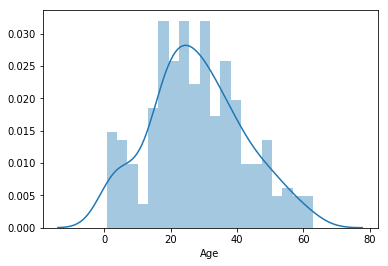

In [81]:

sb.distplot(df[df['Sex'] == 'female']['Age'].dropna(), hist=True, kde=True, bins=20)


In [82]:
sb.violin(x="Sex", y="Age", data=df)


AttributeError: module 'seaborn' has no attribute 'violin'

In [1]:
#  wtf